In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
data1 = pd.read_csv(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\Train.csv')
data2 = pd.read_excel(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\Events_HolidaysData.xlsx')
data3 = pd.read_excel(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\MacroEconomicData.xlsx')
data4 = pd.ExcelFile(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\WeatherData.xlsx')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data1.head(5)

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [5]:
data2.head(5)

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [6]:
data2 = data2[data2['Year'] < 2016]

In [7]:
data3.head(5)

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [8]:
data3 = data3.iloc[:84]

In [9]:
Weather_Data_list = []
for i in range(0,len(data4.sheet_names)):
    Weather_Data_list.append(data4.parse(data4.sheet_names[i])) 
    
    Weather_Data_list[i].Year = data4.sheet_names[i]
Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"] = Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"]\
.shift(-1)
Weather_Data_list[5] = Weather_Data_list[5][:-1].copy()
data5 = pd.DataFrame()
for df in Weather_Data_list:
    data5 = pd.concat([data5,df])

In [10]:
data1['Date'] = data1.Year.astype(str).str.cat(data1.Month.astype(str), sep='-')
data1['Date'] = pd.to_datetime(data1.Date.astype(str) + "-1")
data1.set_index('Date', inplace = True)
data1.drop(["Year","Month"],axis =1, inplace=True)

In [11]:
data2.MonthDate = data2.MonthDate.astype(str).str[2:7]

In [12]:
data2['Date'] = pd.to_datetime(data2.Year.astype(str).str.cat(data2.MonthDate.astype(str), sep='-'), format='%Y-%d-%m')
data2.drop(["Year","MonthDate"],axis =1, inplace=True)
data2.set_index('Date', inplace = True)

In [13]:
data3.rename(columns = {'Year-Month':'Date'}, inplace = True)
data3['Date'] = pd.to_datetime(data3.Date.astype(str) + "-1")
data3.set_index('Date', inplace = True)

In [14]:
data5['Date'] = pd.to_datetime(data5.Year.astype(str).str.cat(data5.Month.astype(str), sep='-')\
                                      .str.cat(data5.Day.astype(str), sep='/'))
data5.drop(["Year","Month","Day"],axis =1, inplace=True)
data5.set_index('Date', inplace = True)

In [15]:
data1.isnull().sum()

ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

In [18]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data1['ProductCategory'])

In [20]:
data1.drop("ProductCategory", axis=1, inplace=True)
data1["ProductCategory"] = label

In [21]:
data1

,Sales(In ThousandDollars),ProductCategory
Date,,
2009-01-01,1755.0,2
2009-01-01,524.0,0
2009-01-01,936.0,1
2009-02-01,1729.0,2
2009-02-01,496.0,0
...,...,...
2015-11-01,643.0,0
2015-11-01,1478.0,1
2015-12-01,5874.0,2


#### Exploratory data analysis

In [22]:
data1.isnull().sum()

Sales(In ThousandDollars)    13
ProductCategory               0
dtype: int64

In [23]:
data1m=data1["Sales(In ThousandDollars)"].mean()

In [24]:
data1["Sales(In ThousandDollars)"]=data1["Sales(In ThousandDollars)"].fillna(data1m)

In [25]:
data1.isnull().sum()

Sales(In ThousandDollars)    0
ProductCategory              0
dtype: int64

Text(0.5, 0.98, 'Count of sales value in each category')

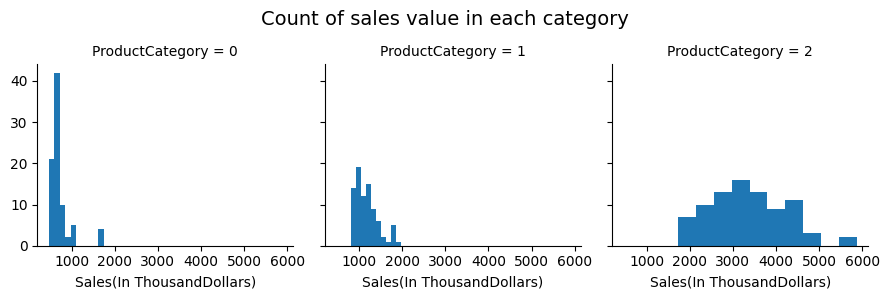

In [26]:
g = sns.FacetGrid(data=data1,col='ProductCategory')
g.map(plt.hist,'Sales(In ThousandDollars)')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Count of sales value in each category', fontsize=14)

In [27]:
data2.isnull().sum()

Event          0
DayCategory    0
dtype: int64

<Axes: title={'center': 'Count Values of Event and Federal Holiday Category'}, ylabel='DayCategory'>

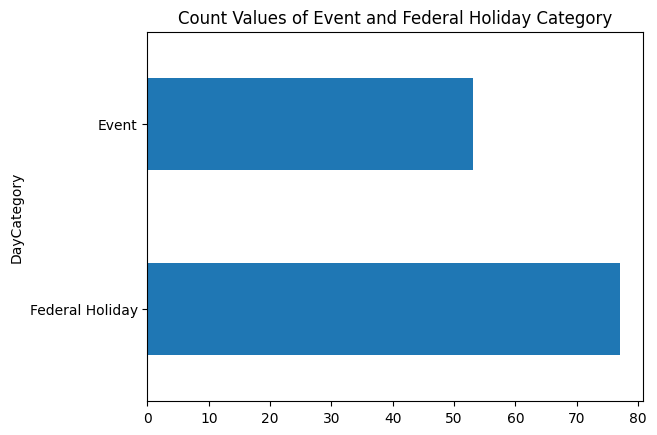

In [28]:
plt.title('Count Values of Event and Federal Holiday Category')
plt.xlabel('values')
plt.ylabel('Categroy')
data2["DayCategory"].value_counts().plot(kind='barh')

<Axes: title={'center': 'Count Values of different categories in Event column'}, ylabel='Event'>

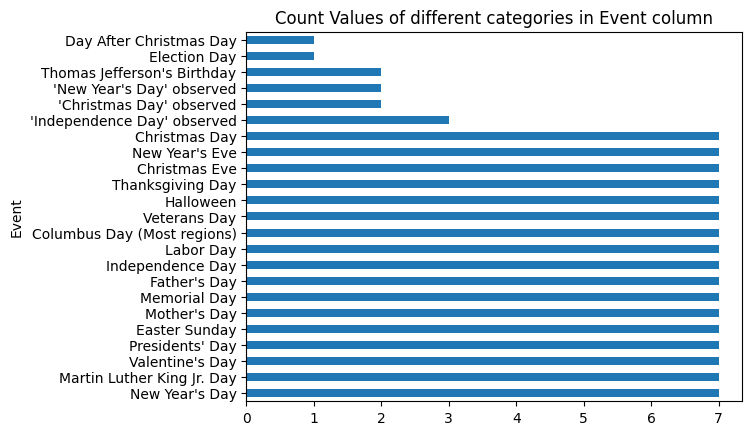

In [29]:
plt.title('Count Values of different categories in Event column')
plt.xlabel(' Count values')
plt.ylabel('Categroy')
data2["Event"].value_counts().plot(kind='barh')

In [30]:
dData2=pd.get_dummies(data2['DayCategory'])

In [31]:
data2=dData2

In [32]:
data2 = data2.resample('M').sum()

In [33]:
data3.drop('PartyInPower', axis=1,inplace=True)

In [34]:
data3.drop('AdvertisingExpenses (in Thousand Dollars)', axis=1,inplace=True)

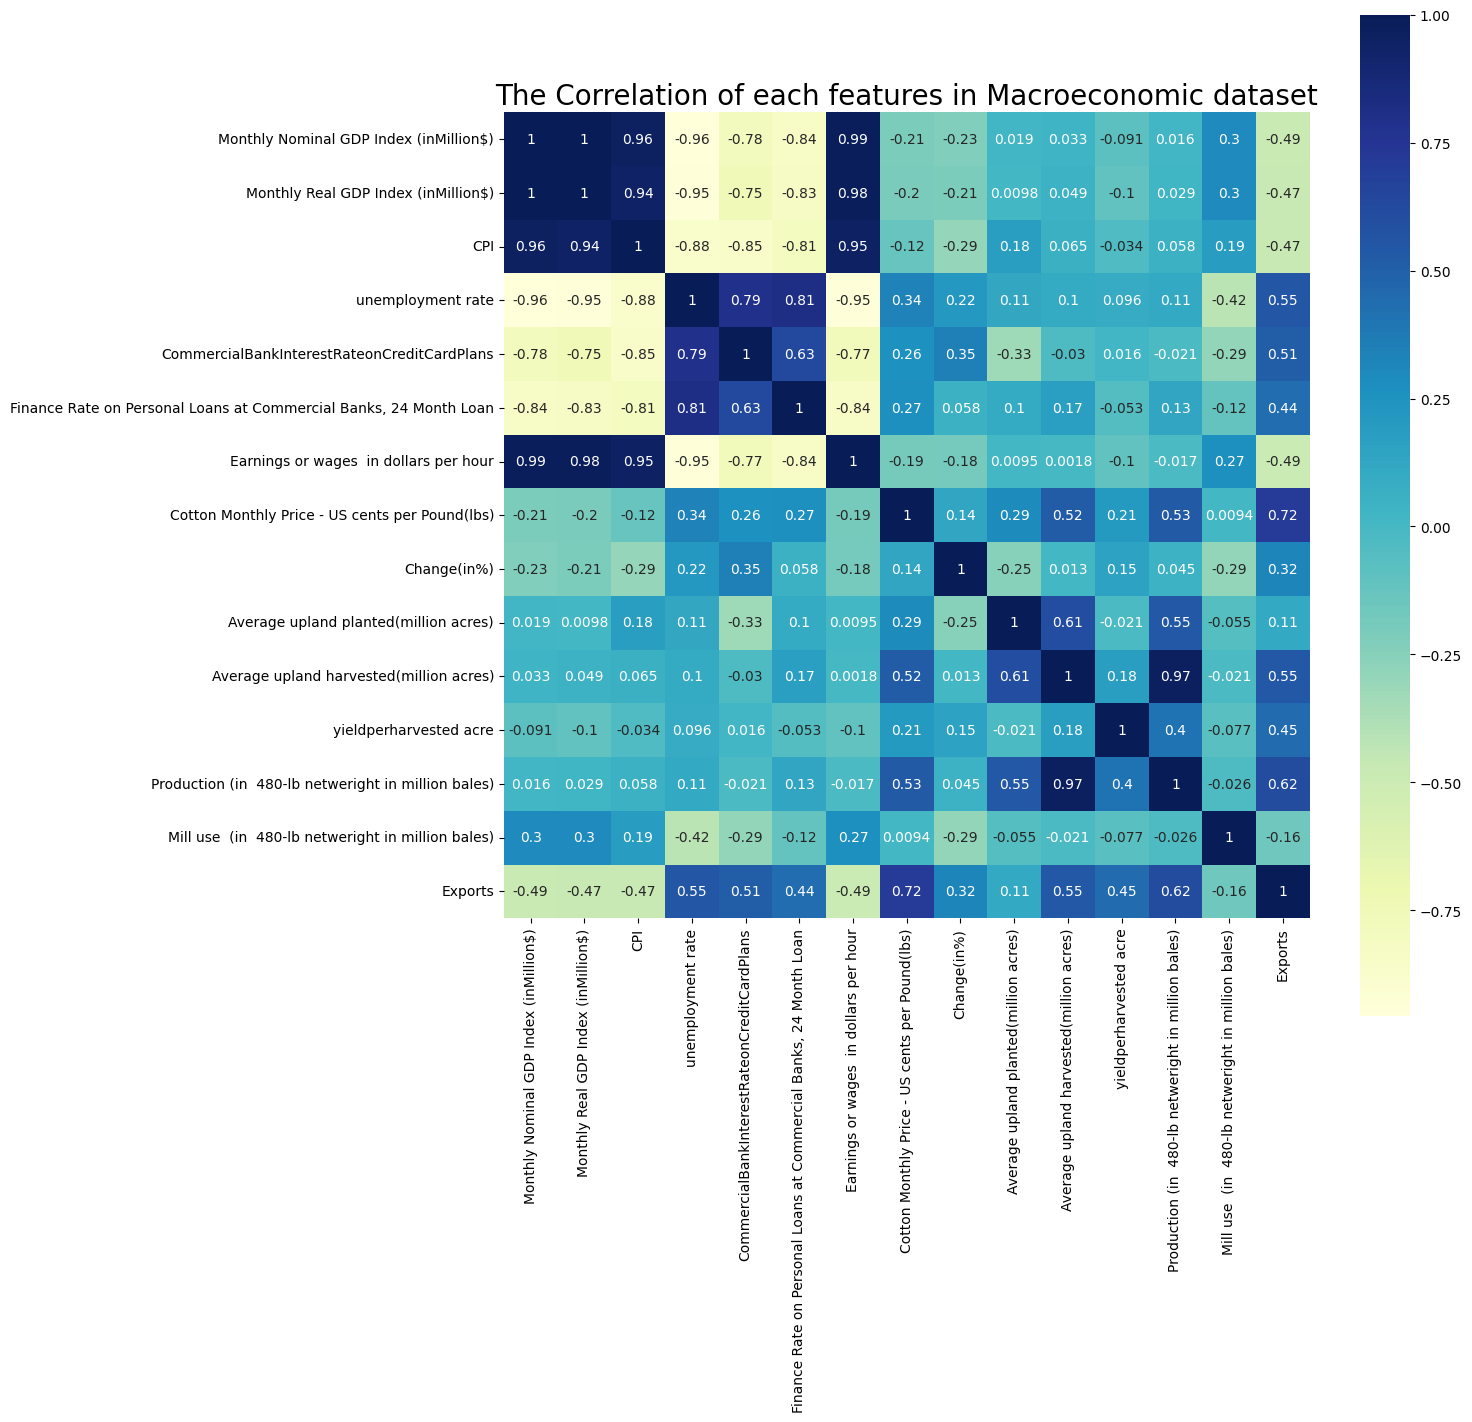

In [35]:
# Calculating the correlation of each variables
correlation = data3.corr()

### Ploting the correlation 
%matplotlib inline
plt.figure(figsize =(13,13))
sns.heatmap(data= correlation,cmap="YlGnBu", annot =True, square= True)
plt.title('The Correlation of each features in Macroeconomic dataset', fontsize= '20')
plt.show()

<Axes: title={'center': 'Count Values of different categories in WeatherEvent column'}, ylabel='WeatherEvent'>

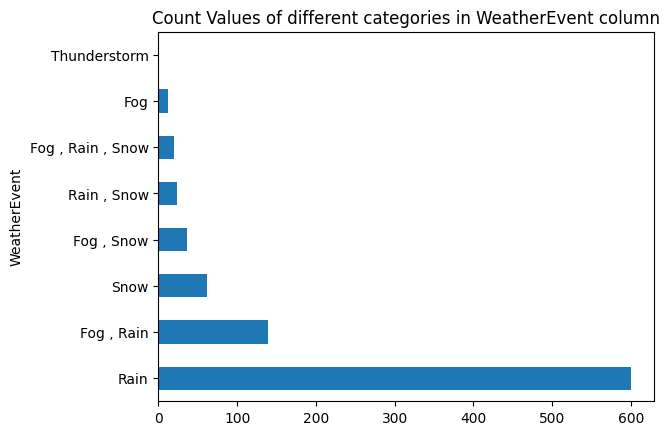

In [36]:
plt.title('Count Values of different categories in WeatherEvent column')
plt.xlabel(' Count values')
plt.ylabel('WeatherEvent')
data5['WeatherEvent'].value_counts().plot(kind='barh')

In [37]:
data5[data5.columns[18]] = data5[data5.columns[18]].apply(lambda x: 0.01 if x == 'T' else x)

In [38]:
data5 = data5.applymap(lambda x: np.nan if x == '-' else x)

In [39]:
data5.WeatherEvent.fillna(value="NotApplicable", inplace=True)
data5 = data5[~data5["Temp high (°C)"].isnull()]

In [40]:
data5 = data5.dropna()

In [41]:
data5.isnull().sum()

Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

In [42]:
data5.drop(['WeatherEvent'],axis=1,inplace=True)

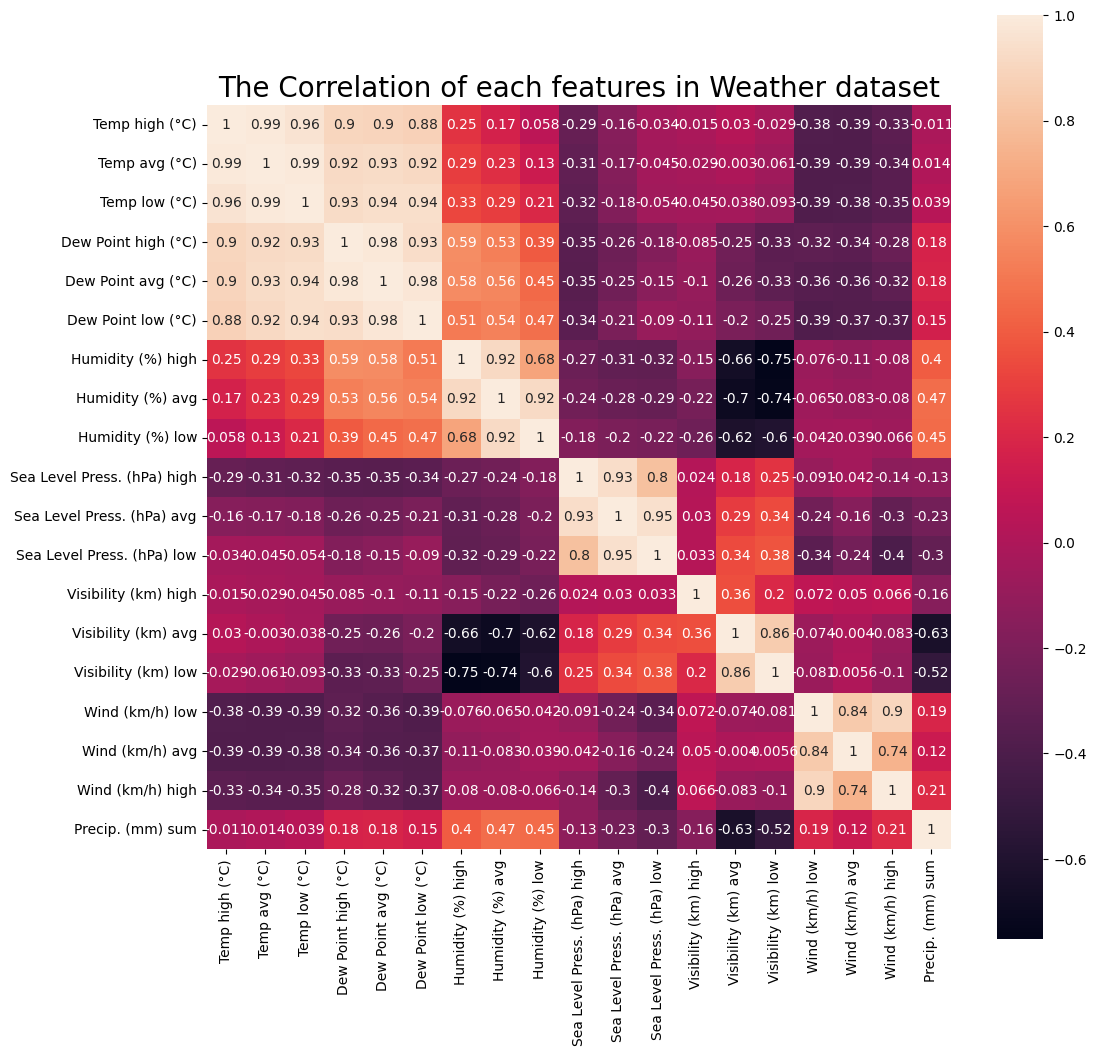

In [43]:
correlation_weather = data5.corr()

### Ploting the correlation 
%matplotlib inline
plt.figure(figsize =(12,12))
sns.heatmap(data= correlation_weather, annot =True, square= True)
plt.title('The Correlation of each features in Weather dataset', fontsize= '20')
plt.show()

In [44]:
data5_mean = data5.resample('M').mean()

In [45]:
data5_mean=data5_mean.drop( ['Temp high (°C)','Temp low (°C)','Dew Point high (°C)','Dew Point low (°C)', 'Humidity (%) high','Humidity (%) low', 'Sea Level Press. (hPa) high', 'Sea Level Press. (hPa) low','Visibility (km) high','Visibility (km) low', 'Wind (km/h) low','Wind (km/h) high'],axis = 1)

In [46]:
data2.index = data3.index
data5_mean.index = data3.index

In [47]:
data_final = data3.join(data5_mean)
data_final = data_final.join(data2)

In [48]:
data_final

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),...,Exports,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,Event,Federal Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,8.750,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,8.398,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,8.398,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


In [49]:
data_final = data_final.join(data1)

In [50]:
list(data_final.columns)

['Monthly Nominal GDP Index (inMillion$)',
 'Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'Temp avg (°C)',
 'Dew Point avg (°C)',
 'Humidity\xa0(%) avg',
 'Sea Level Press.\xa0(hPa) avg',
 'Visibility\xa0(km) avg',
 'Wind\xa0(km/h) avg',
 'Precip.\xa0(mm) sum',
 'Event',
 'Federal Holiday',
 'Sales(In ThousandDollars)',
 'ProductCategory']

In [51]:
data_final.shape

(252, 26)

In [52]:
data_final.head(10)

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),...,Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,Event,Federal Holiday,Sales(In ThousandDollars),ProductCategory
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2,1755.0,2
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2,524.0,0
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2,936.0,1
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1,1729.0,2
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1,496.0,0
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1,859.0,1
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0,2256.0,2
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0,542.0,0
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0,921.0,1


In [53]:
data_final.isnull().sum()

Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Average upland harvested(million acres)                              0
yieldperharvested acre                                               0
Production (in  480-lb netweright in million bales)                  0
Mill use  (in  480-lb netweright in million bales)                   0
Export

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [55]:
X=data_final[['Monthly Nominal GDP Index (inMillion$)',
 'Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'Temp avg (°C)',
 'Dew Point avg (°C)',
 'Humidity\xa0(%) avg',
 'Sea Level Press.\xa0(hPa) avg',
 'Visibility\xa0(km) avg',
 'Wind\xa0(km/h) avg',
 'Precip.\xa0(mm) sum',
 'Event',
 'Federal Holiday','ProductCategory']]
y=data_final['Sales(In ThousandDollars)']

In [58]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.9 MB 21.7 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 25.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 22.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                              feature            VIF
0              Monthly Nominal GDP Index (inMillion$)  347434.257731
1                 Monthly Real GDP Index (inMillion$)  527358.669117
2                                                 CPI  102353.816927
3                                   unemployment rate    2612.304529
4         CommercialBankInterestRateonCreditCardPlans    4730.838247
5   Finance Rate on Personal Loans at Commercial B...    2730.187481
6              Earnings or wages  in dollars per hour   66694.245111
7      Cotton Monthly Price - US cents per Pound(lbs)      42.856800
8                                         Change(in%)       1.832428
9               Average upland planted(million acres)     297.588752
10            Average upland harvested(million acres)   15545.407627
11                             yieldperharvested acre   15811.464322
12  Production (in  480-lb netweright in million b...   15178.262880
13  Mill use  (in  480-lb netwerig

In [60]:
X=X.drop('Monthly Real GDP Index (inMillion$)',axis=1)

In [61]:
X=X.drop('Monthly Nominal GDP Index (inMillion$)',axis=1)

In [62]:
X=X.drop('Earnings or wages  in dollars per hour',axis=1)

In [63]:
X=X.drop('Sea Level Press.\xa0(hPa) avg',axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [65]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<BarContainer object of 21 artists>

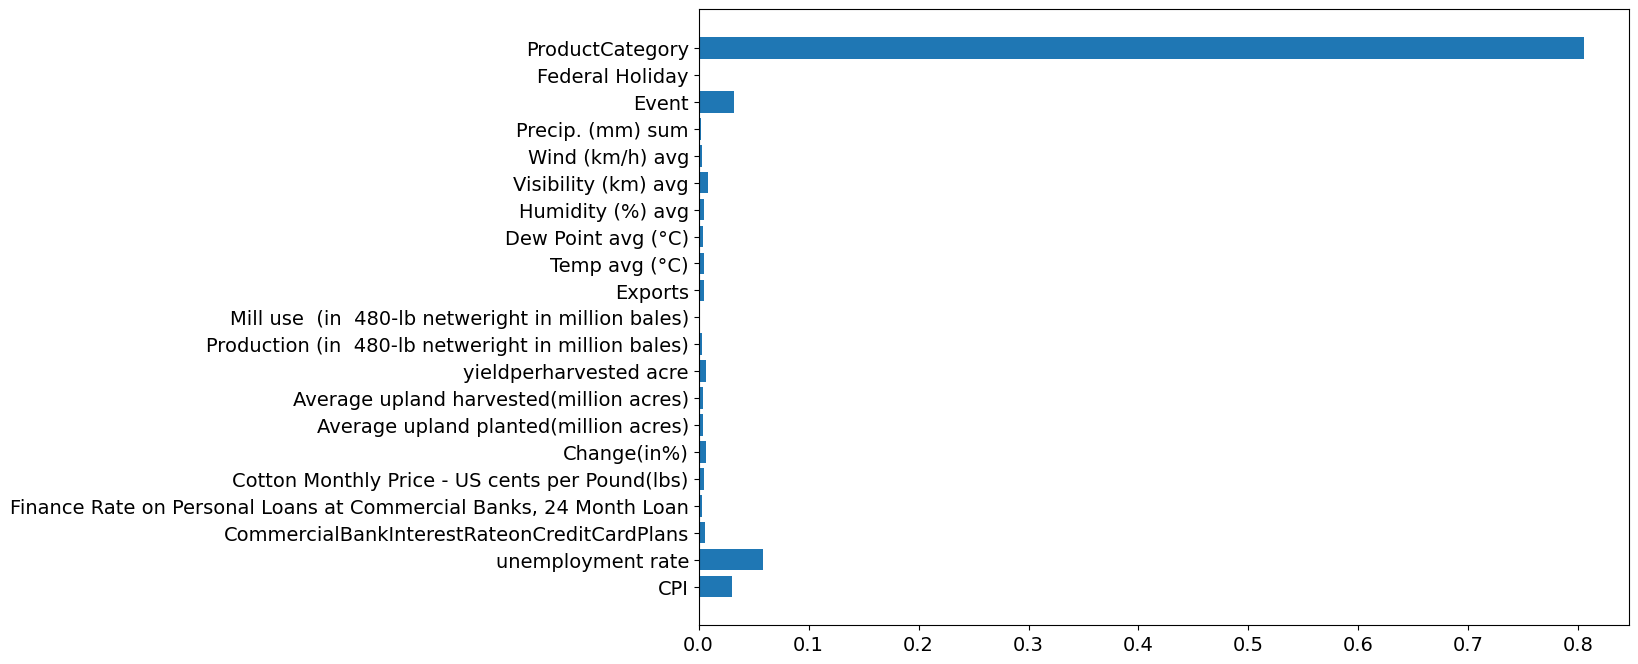

In [66]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

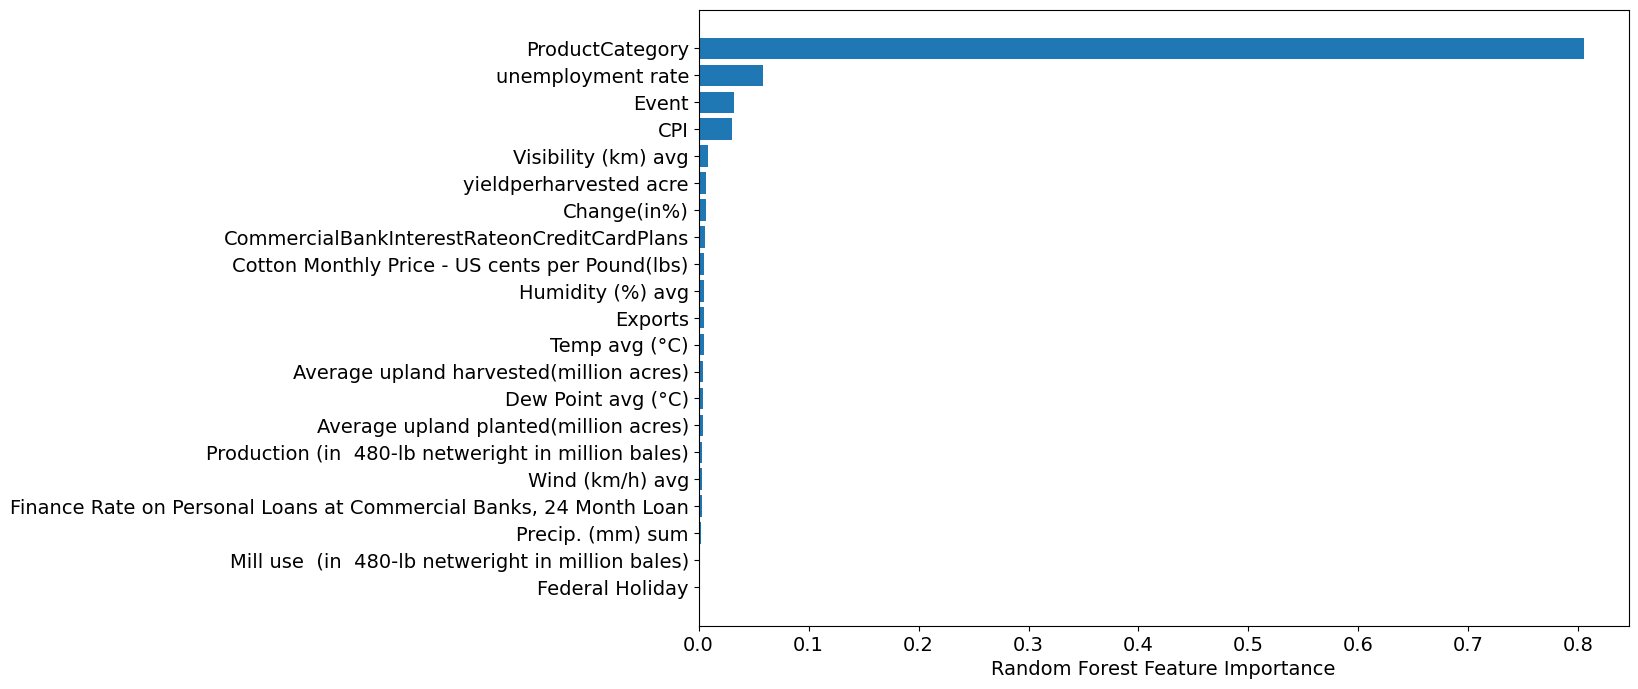

In [67]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [68]:
X=data_final[['ProductCategory','unemployment rate','Event','CPI','Exports','Cotton Monthly Price - US cents per Pound(lbs)','yieldperharvested acre','Average upland planted(million acres)','Visibility\xa0(km) avg','Change(in%)']]
y=data_final['Sales(In ThousandDollars)']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [70]:
list(X.columns)

['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)']

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)'])], remainder='passthrough')

ct.fit_transform(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
print("Intercept: ", lr.intercept_)
print("Coefficients:")
list(zip(X, lr.coef_))

Intercept:  1750.8428984783193
Coefficients:


[('ProductCategory', np.float64(1058.9053662173512)),
 ('unemployment rate', np.float64(-59.17534722217532)),
 ('Event', np.float64(197.2163761152881)),
 ('CPI', np.float64(188.92419399099828)),
 ('Exports', np.float64(31.085996988360183)),
 ('Cotton Monthly Price - US cents per Pound(lbs)',
  np.float64(-5.197287801262678)),
 ('yieldperharvested acre', np.float64(-26.68909759946585)),
 ('Average upland planted(million acres)', np.float64(11.604982881770768)),
 ('Visibility\xa0(km) avg', np.float64(77.24275793569521)),
 ('Change(in%)', np.float64(-12.620176539794748))]

In [74]:
y_pred_tr=lr.predict(X_train)

In [75]:
y_pred= lr.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1605.83267264 1411.737117   2070.49903667 3377.27444229 3148.68222721
 2378.98382342  448.9564181  1627.16939274 1813.49253563  412.35801419
  665.66146474  -20.98539826 3120.26794125  658.27174646  648.71427722
 2186.90524672 3238.74492846  352.59039509 2996.7171859   763.72363105
  324.64409517  811.86104252 3279.21227599 2005.53316999  362.16489955
 1755.39137051 1269.26731281  698.75776437 3062.16677613  880.12984109
  299.05726702 3083.8985221  2895.50610587  244.66478612 1285.79000736
  673.68493413 3186.95380246 2750.32623777 3385.54495309 1458.85541114
 1861.08202544 3764.5327341  3370.20948167 3271.82255771 2939.48890387
  320.39398712 -208.8482133   750.76360982 1306.83873489 1468.44784856
 2579.08614154]


In [76]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
Date,,
2010-10-01,930.00000,1605.832673
2010-08-01,897.00000,1411.737117
2014-06-01,1746.60251,2070.499037
2014-06-01,3905.00000,3377.274442
2013-05-01,4170.00000,3148.682227


In [77]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print(mape)

Mean Absolute Error: 562.0689872486455
Mean Square Error: 499326.9125301231
Root Mean Square Error: 706.6306761881507
0.4112367888278189


<Axes: xlabel='Sales(In ThousandDollars)'>

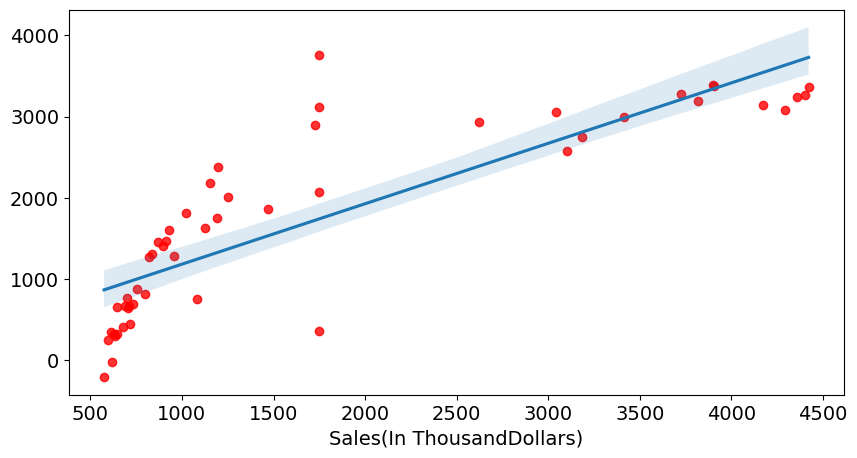

In [78]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'red'})

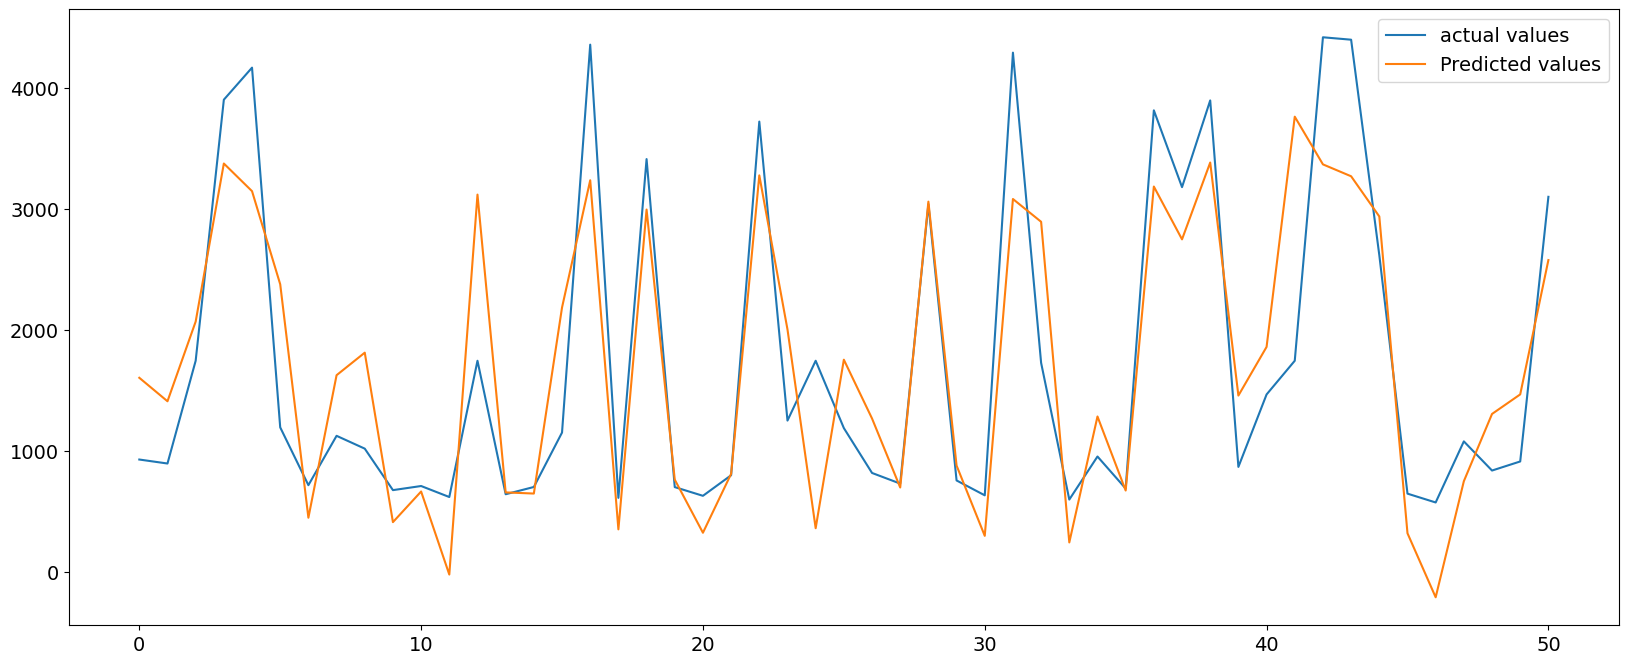

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
plt.legend()
plt.show()

### XG Boost

In [82]:
import xgboost as xgb

In [83]:
X=data_final[['ProductCategory','unemployment rate','Event','CPI','Exports','Cotton Monthly Price - US cents per Pound(lbs)','yieldperharvested acre','Average upland planted(million acres)','Visibility\xa0(km) avg','Change(in%)']]
y=data_final['Sales(In ThousandDollars)']

In [84]:
list(X.columns)

['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)'])], remainder='passthrough')

ct.fit_transform(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
xgb_preds = xg_reg.predict(X_test)

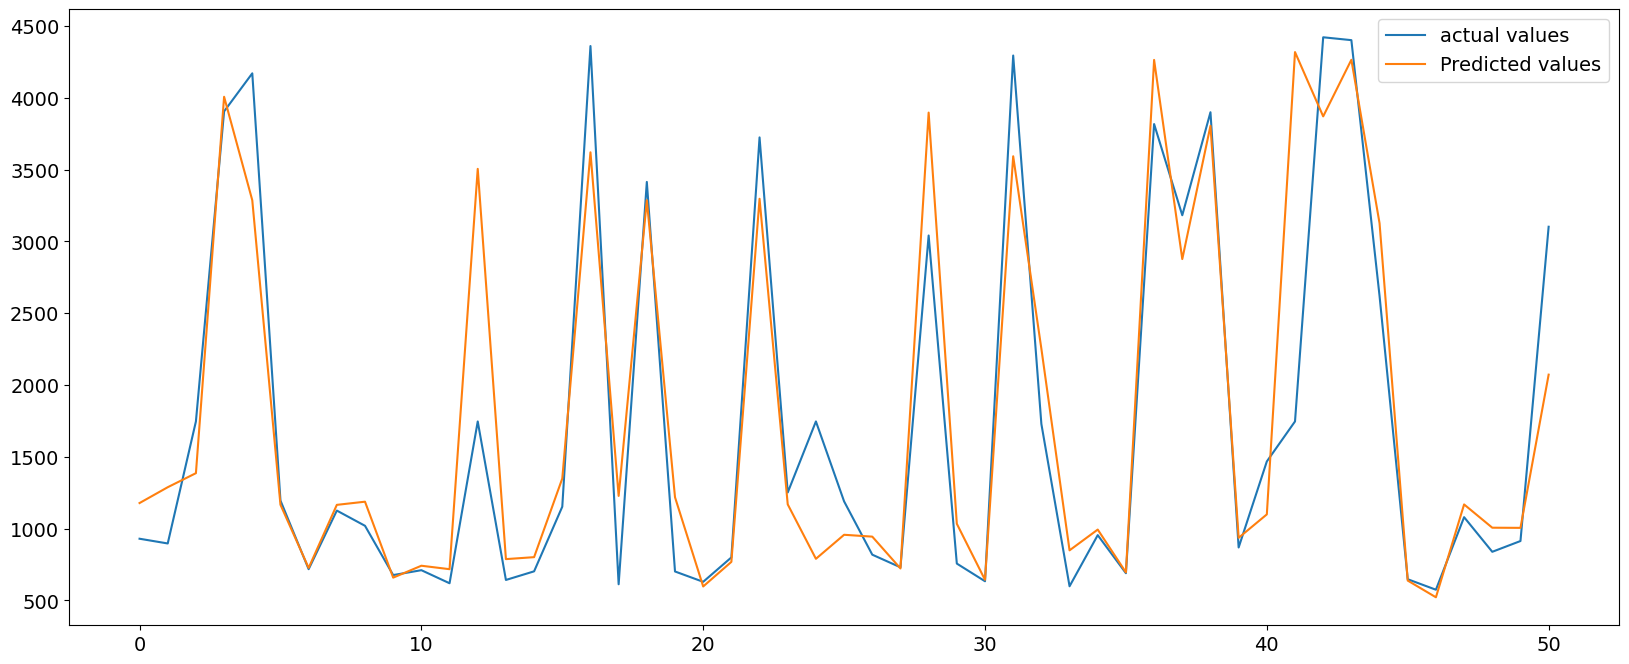

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],xgb_preds, label="Predicted values")
plt.legend()
plt.show()

In [90]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, xgb_preds)
meanSqErr = metrics.mean_squared_error(y_test, xgb_preds)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, xgb_preds))
mape=metrics.mean_absolute_percentage_error(y_test,xgb_preds)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean absolute percentage error',mape)

Mean Absolute Error: 345.52787631165745
Mean Square Error: 335361.7938784951
Root Mean Square Error: 579.1043031082528
Mean absolute percentage error 0.2173388178893726


In [91]:
from sklearn.metrics import r2_score
# Evaluating the model
print('R score is :', r2_score(y_test, xgb_preds))

R score is : 0.8043527476658716


### Random Forest

In [92]:
X=data_final[['ProductCategory','unemployment rate','Event','CPI','Exports','Cotton Monthly Price - US cents per Pound(lbs)','yieldperharvested acre','Average upland planted(million acres)','Visibility\xa0(km) avg','Change(in%)']]
y=data_final['Sales(In ThousandDollars)']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [94]:
y_train.shape

(201,)

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)'])], remainder='passthrough')

ct.fit_transform(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [97]:
predictions = rf.predict(X_test)

In [98]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
mape=metrics.mean_absolute_percentage_error(y_test,predictions)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean absolute percentage error',mape)

Mean Absolute Error: 339.496028960539
Mean Square Error: 359910.64777151815
Root Mean Square Error: 599.9255351887583
Mean absolute percentage error 0.21027791819559405


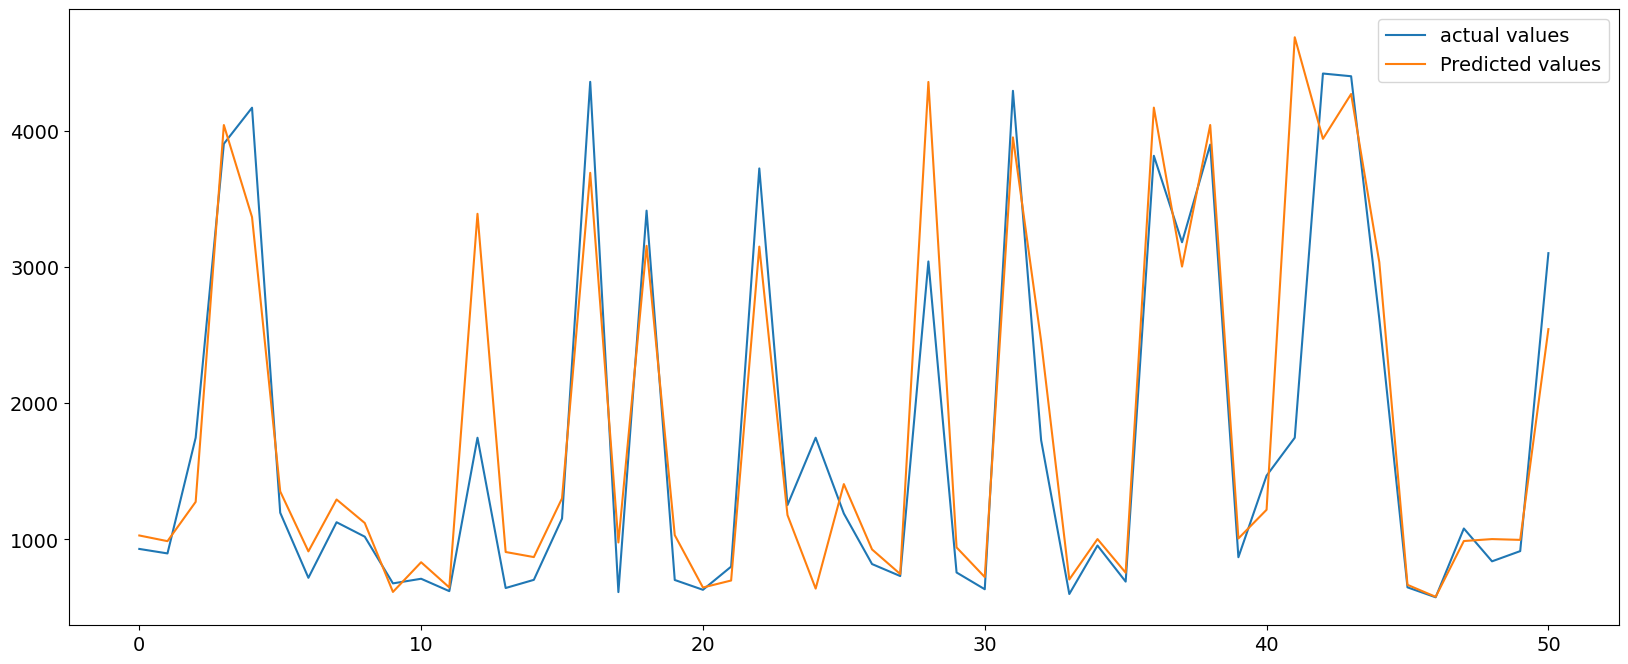

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],predictions, label="Predicted values")
plt.legend()
plt.show()

#### Support vector regression

In [100]:
X=data_final[['ProductCategory','unemployment rate','Event','CPI','Exports','Cotton Monthly Price - US cents per Pound(lbs)','yieldperharvested acre','Average upland planted(million acres)','Visibility\xa0(km) avg','Change(in%)']]
y=data_final['Sales(In ThousandDollars)']

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['ProductCategory',
 'unemployment rate',
 'Event',
 'CPI',
 'Exports',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'yieldperharvested acre',
 'Average upland planted(million acres)',
 'Visibility\xa0(km) avg',
 'Change(in%)'])], remainder='passthrough')

ct.fit_transform(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [104]:
y_pred = regressor.predict(X_test)

In [105]:
y_pred

array([1193.17536857, 1192.85601028, 1200.8935466 , 1210.05317945,
       1199.00487786, 1202.04890854, 1190.12053015, 1196.57911863,
       1194.09125142, 1191.63071079, 1188.11441008, 1185.57634597,
       1202.45092408, 1194.07597885, 1187.57408935, 1203.07478965,
       1196.2579476 , 1184.78130157, 1194.45016188, 1190.14492598,
       1187.02356043, 1191.23115217, 1204.41098219, 1198.84859182,
       1187.07940834, 1198.84418938, 1191.7158145 , 1186.9732674 ,
       1206.49600911, 1192.31383812, 1190.14780859, 1207.307074  ,
       1199.96538028, 1186.67119806, 1192.20187652, 1194.1137106 ,
       1209.04384328, 1199.01558929, 1209.42504595, 1192.78298311,
       1201.29586229, 1208.08745399, 1211.26192596, 1208.24829096,
       1193.93690372, 1186.16686855, 1184.44421727, 1190.34831848,
       1192.69338155, 1192.01364862, 1199.83421343])

In [106]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean absolute percentage error',mape)

Mean Absolute Error: 977.3053412342837
Mean Square Error: 1984543.3595304142
Root Mean Square Error: 1408.7382154007232
Mean absolute percentage error 0.5332912350527007


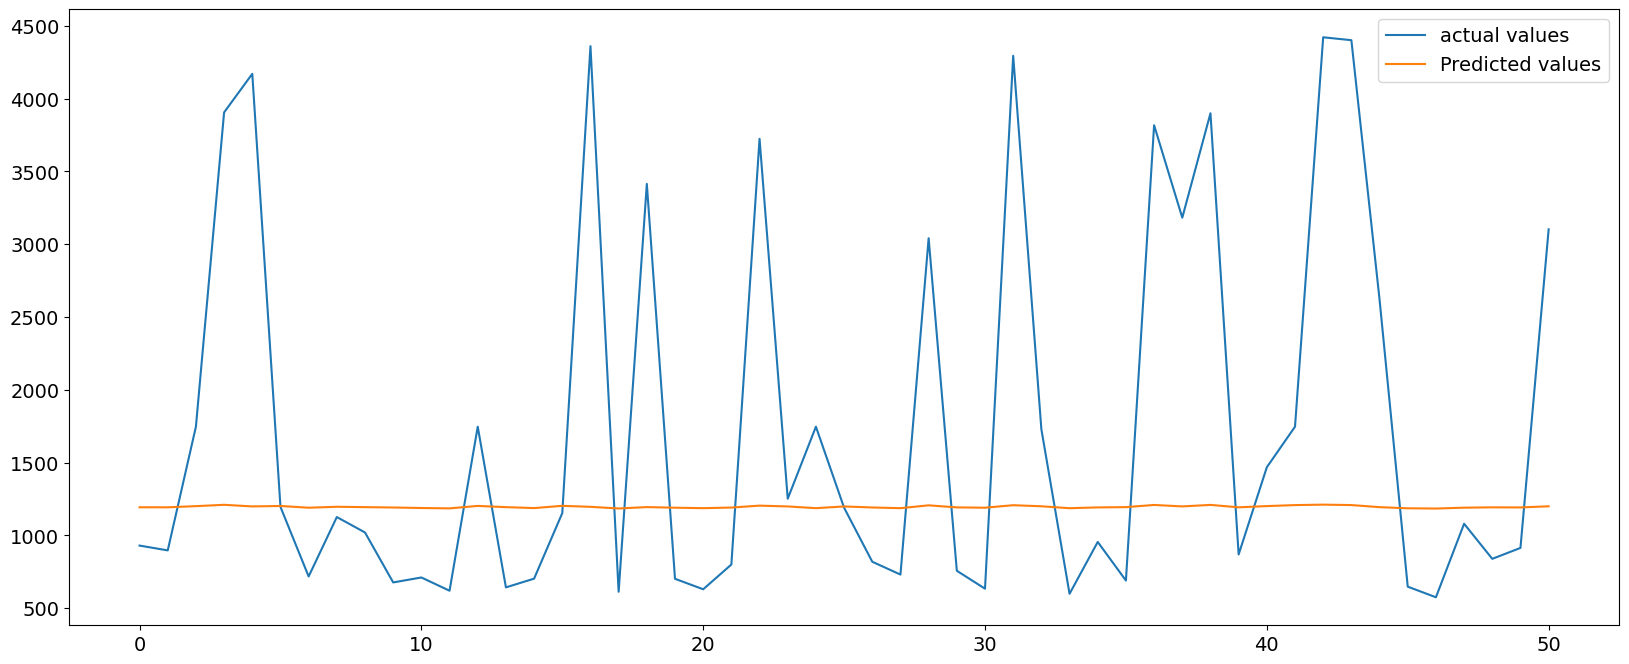

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
plt.legend()
plt.show()